# **Unsupervised Learning Project: AllLife Bank Customer Segmentation**

# 

Welcome to the project on Unsupervised Learning. We will be using **Credit Card Customer Data** for this project.

--------------------------------
## **Context** 
-------------------------------

**AllLife Bank wants to focus on its credit card customer base** in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. 

Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the operations team wants to upgrade the service delivery model, to ensure that customers' queries are resolved faster. The head of marketing and the head of delivery, both decide to reach out to the Data Science team for help.


----------------------------
## **Objective**
-----------------------------

**Identify different segments in the existing customer base**, taking into account their spending patterns as well as past interactions with the bank.

--------------------------
## **About the data**
--------------------------

Data is available on customers of the bank with their credit limit, the total number of credit cards the customer has, and different channels through which the customer has contacted the bank for any queries. These different channels include visiting the bank, online, and through a call center.

- **Sl_no** - Customer Serial Number
- **Customer Key** - Customer identification
- **Avg_Credit_Limit**	- Average credit limit (currency is not specified, you can make an assumption around this)
- **Total_Credit_Cards** - Total number of credit cards 
- **Total_visits_bank**	- Total bank visits
- **Total_visits_online** - Total online visits
- **Total_calls_made** - Total calls made

## **Importing libraries and overview of the dataset**

**Note:** Please make sure you have installed the sklearn_extra library before running the below cell. If you have not installed the library, please run the below code to install the library:

!pip install scikit-learn-extra

In [1]:
!pip install scikit-learn-extra

In [2]:
# Importing all the necessary packages


import pandas as pd

import numpy as np

import matplotlib.pylab as plt

import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# Importing clustering algorithms
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

from sklearn_extra.cluster import KMedoids

import warnings
warnings.filterwarnings("ignore")

### **Loading the data**

In [33]:
data = pd.read_excel('Credit+Card+Customer+Data.xlsx')

data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### **Check the info of the data**

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations:**

- There are **660 observations and 7 columns** in the dataset.
- All the columns have 660 non-null values, i.e., there are **no missing values**.
- **All the columns are of integer data type**.

**There are no missing values. Let us now figure out the number of unique values in each column.** 

In [35]:
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

- Customer key, which is an identifier, has duplicate values. We will treat the duplicate customer keys before applying any algorithm.

## **Data Preprocessing and Exploratory Data Analysis**

### **Checking duplicate customer keys**

As mentioned above, the Customer Key column has duplicate values. Let's find the rows with duplicate customer keys.

### **Question 1: Drop the rows with duplicate customer keys**

In [36]:
# There are some duplicates in the column 'Customer Key'. Let us explore

duplicate_keys = data['Customer Key'].duplicated()

data[duplicate_keys]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


- There are **5 duplicate customer keys**. We can **drop these observations**.

**Note:** We are not making any assumptions about which row with the duplicate keys should be dropped. For example, if row 2 and row 10 have duplicate customer keys, then any one of the two rows can be dropped.

In [37]:
# let's drop duplicate keys

data = data.drop_duplicates(keep = 'first', subset = 'Customer Key')

### **Dropping columns** 

We have done some basic checks. Now, **let's drop the variables that are not required for our analysis**.

In [38]:
data.drop(columns = ['Sl_No', 'Customer Key'], inplace = True)

### **Checking duplicate rows**

Now, that we have dropped unnecessary columns, we can again check for duplicates. **Duplicates would mean customers with identical features.**

In [39]:
data[data.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


- There are 11 duplicate rows. We can drop these duplicate rows from the data.

In [40]:
data = data[~data.duplicated()]

In [41]:
data.shape

(644, 5)

- After removing the duplicate keys, the duplicate rows, and dropping unnecessary columns, there are 644 unique observations and 5 columns in our data.

### **Summary Statistics**

### **Question 2: Write your observations on the summary statistics of the data**

In [42]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,644.0,34543.478261,37428.704286,3000.0,11000.0,18000.0,48000.00,200000.0
Total_Credit_Cards,644.0,4.694099,2.175338,1.0,3.0,5.0,6.00,10.0
Total_visits_bank,644.0,2.395963,1.626964,0.0,1.0,2.0,4.00,5.0
Total_visits_online,644.0,2.624224,2.957728,0.0,1.0,2.0,4.00,15.0
Total_calls_made,644.0,3.608696,2.880025,0.0,1.0,3.0,5.25,10.0


**Observations:  
Since the duplicated data was cleaned up, the observations become 644 counts.  
Each mean and 50%(median) are close each other.   
Total_Credit_Cards and Total_visits_online has high max amount 10 and 15 respectively.  
Compared to std and 75% in Total_Credit_Cards, std 2.17 and 75% 6  while max is 10.   
Compared to std and 75% in Total_visits_online, std 2.95 and 75% 4  while max is 15.   
Those 2 maxes are relatiely high compared to the std and 75%. Outliers may be existing.   
**

**Now, let's go ahead with exploring each variable at hand.**

### **Question 3: Check the distribution and outliers for each variable in the data.**

- **Check the distribution of all variables (use .hist() attribute) (2 Marks)**
- **Check outliers for all variables (use sns.boxplot()) (2 Mark)**
- **Write your observations (1 Marks)**

Avg_Credit_Limit
Skew : 2.19


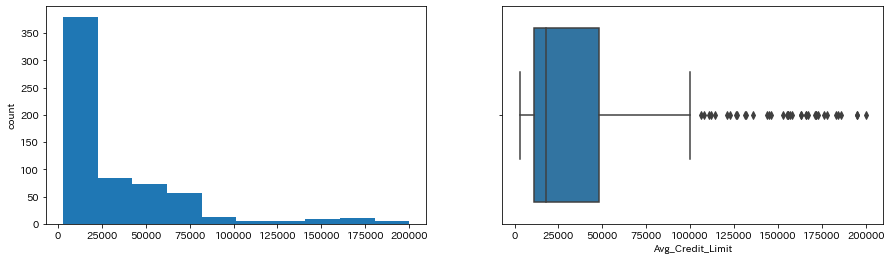

Total_Credit_Cards
Skew : 0.17


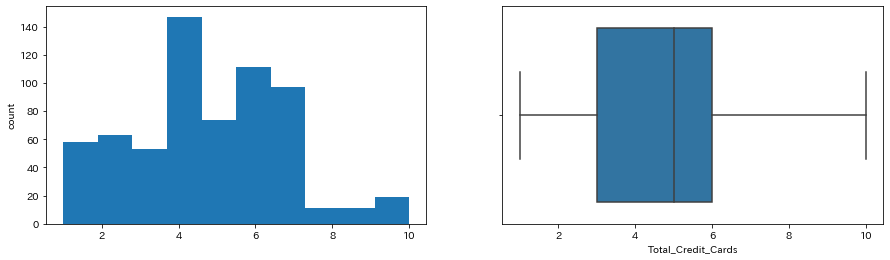

Total_visits_bank
Skew : 0.15


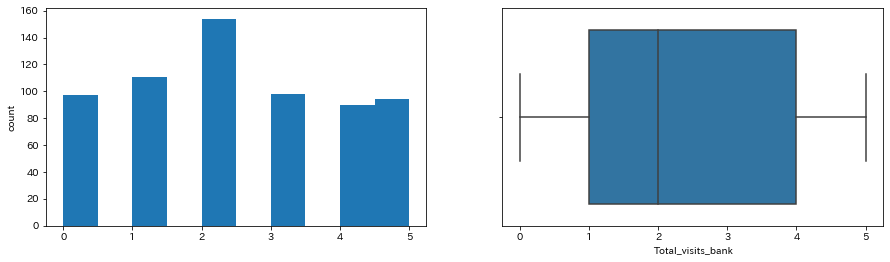

Total_visits_online
Skew : 2.21


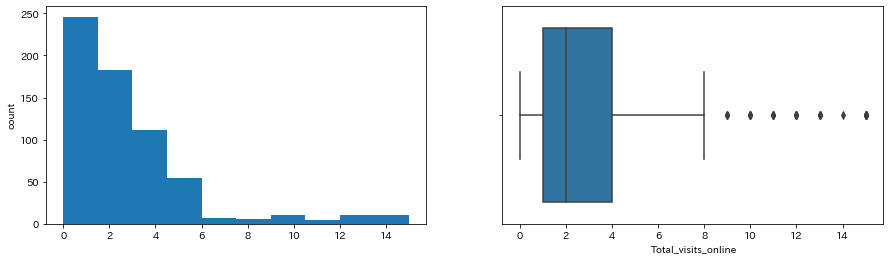

Total_calls_made
Skew : 0.65


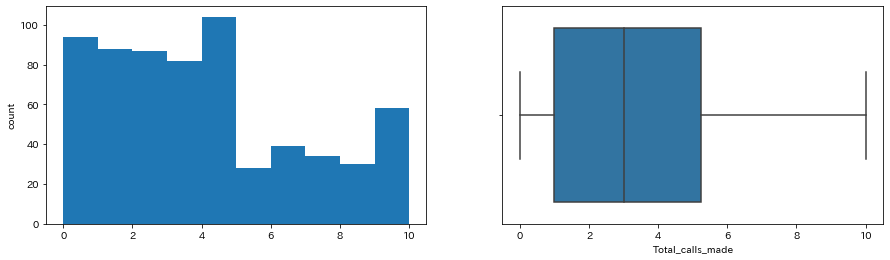

In [43]:
# complete the BELOW code by filling the blanks, before running the cell to avoid any errors 

for col in data.columns:
    print(col)
    
    print('Skew :', round(data[col].skew(), 2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

**Observation:
Avg_Credit_Limit, Total_visits_online, and Total_calls_made have skewed right side on the boxplot. Avg_Credit_Limit and Total_visits_online have outliers.  
Total_visits_bank has randomly distributed the amount.  
**

### **Checking correlation**

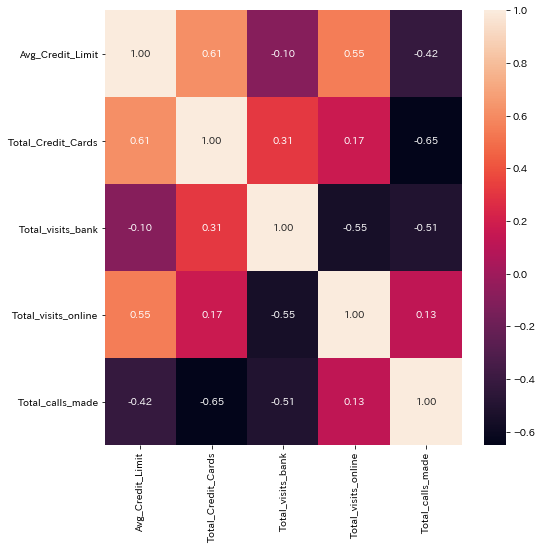

In [44]:
plt.figure(figsize = (8, 8))

sns.heatmap(data.corr(), annot = True, fmt = '0.2f')

plt.show()

**Observations:**  
-Avg_Credit_Limit is positively correlated with Total_Credit_Cards and Total_visits_online which makes sense.  
-Avg_Credit_Limit is negatively correlated with Total_calls_made and Total_visits_bank.  
-Total_visits_bank, Total_visits_online, Total_calls_made are negatively correlated which implies that majority of customers use only one of these channels to contact the bank.  

### **Scaling the data**

In [45]:
scaler = StandardScaler()

# Standardize the data to have a mean of ~0 and a variance of 1
data_scaled = StandardScaler().fit_transform(data)

### **Applying PCA on scaled data**

In [46]:
from sklearn.decomposition import PCA

n = data.shape[1]

# Create a PCA instance: pca
pca = PCA(n_components=n)

principal_components = pca.fit_transform(data_scaled)

# Save components to a DataFrame
data_pca = pd.DataFrame(principal_components, columns = data.columns)

In [47]:
# Creating copy of the data to store labels from each algorithm

data_copy = data_pca.copy(deep = True)

## **K-Means**

Let us now fit the K-means algorithm on our pca components and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initialize a dictionary to store the Sum of Squared Error (SSE) for each K
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and plot the elbow curve

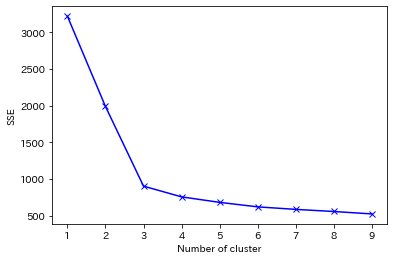

In [48]:
# step 1
sse = {} 

# step 2 - iterate for a range of Ks and fit the pca components to the algorithm. 
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, random_state = 1).fit(data_pca)
    sse[k] = kmeans.inertia_     # Use inertia attribute from the clustering object and store the inertia value for that K

# step 3
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()

### **Question 4:** 

- **Interpret the above elbow plot and state the reason for choosing K=3 **
- **Fit the K-means algorithms on the pca components with the number of clusters equal to 3 **
- **Store the predictions as 'Labels' to the 'data_copy' and 'data' DataFrames **

In [49]:
kmeans = KMeans(n_clusters = 3, random_state = 1)                      # Apply the K-Means algorithm
kmeans.fit(data_pca)                           # Fit the kmeans function on the pca components

# Adding predicted labels to the original data and the copied data 
data_copy['Labels'] = kmeans.predict(data_pca)     # Save the predictions on the pca components from K-Means
data['Labels'] = kmeans.predict(data_pca)             # Save the predictions on the pca components from K-Means

We have generated the labels with K-means. Now, let us look at the various features based on the labels.

### **Question 5: Create the cluster profiles using the below summary statistics and box plots for each label**

In [50]:
# Number of observations in each cluster
data.Labels.value_counts()

1    374
0    221
2     49
Name: Labels, dtype: int64

In [51]:
# Calculating summary statistics of the original data for each label
mean = data.groupby('Labels').mean()

median = data.groupby('Labels').median()

df_kmeans = pd.concat([mean, median], axis = 0)

df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12239.819005,33893.048128,140102.040816,12000.0,31500.0,145000.0
Total_Credit_Cards,2.411765,5.508021,8.775510,2.0,6.0,9.0
Total_visits_bank,0.945701,3.489305,0.591837,1.0,3.0,1.0
Total_visits_online,3.561086,0.975936,10.979592,4.0,1.0,11.0
Total_calls_made,6.891403,1.997326,1.102041,7.0,2.0,1.0


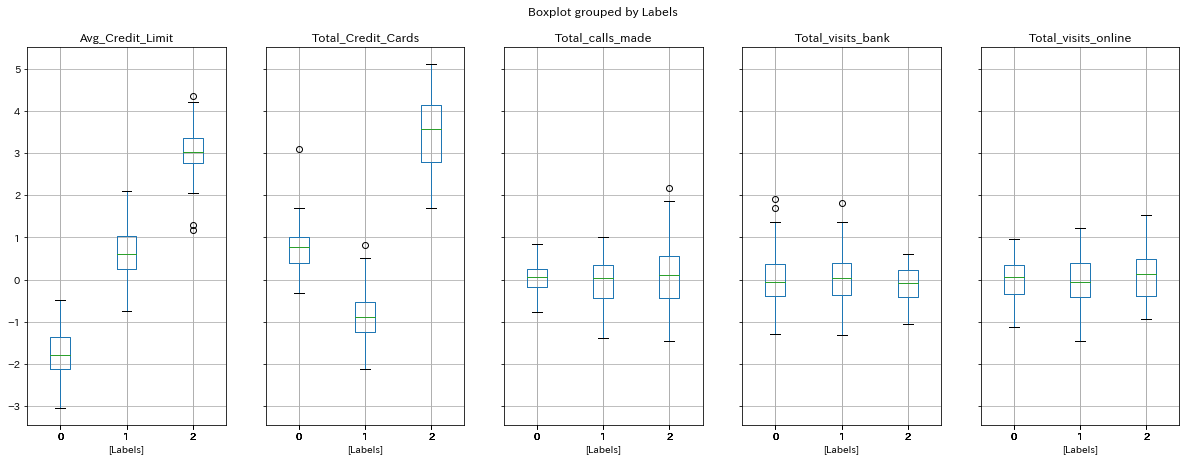

In [52]:
# Visualizing different features w.r.t K-means labels
data_copy.boxplot(by = 'Labels', layout = (1, 5), figsize = (20, 7))

plt.show()

**Cluster Profiles:
Cluster2 has the highest scores of credit scores and the highest number of credit cards. Their calling frequency is distributed wide range but it is almost same as other 2 groups in terms of the median. There are also outliers. They visit online website about same as other 2 groups. But the range is slightly upper than others.Their frequency of visiting bank is not much different with others but the range (min to max) is the narrowest in the 3clusters.   

Cluster1 is between Cluster0 and Cluster2. Their average credit limit are beteween the 2 clusters. Their Total credit cards  are the lowest among these 3 clusters.  Visiting bank, call made, and visiting online websiteis are almost same as other 2 clusters.   

Cluster0 shows the lowest score of credit score. The total credit card is between the other 2 clusters. Their calling frequency, Visiting bank, and visiting online website are almost same as other 2 clusters. The range of calls made is the narrowest among the 3 clusters. The Bank visit has outliers.  
**

## **Gaussian Mixture Model**

Let's now create clusters using the Gaussian Mixture Model.

### **Question 6:** 

- **Apply the Gaussian Mixture Model algorithm on the pca components with n_components=3 and random_state=1 ** 
- **Create the cluster profiles using the below summary statistics and box plots for each label **
- **Compare the clusters from both algorithms - K-means and Gaussian Mixture Model**

In [55]:
gmm = GaussianMixture(n_components = 3, random_state = 1)     # Apply the Gaussian Mixture algorithm on the pca components with n_components=3 and random_state=1

gmm.fit(data_pca)    # Fit the model on the pca components

data_copy['GmmLabels'] = gmm.predict(data_pca)

data['GmmLabels'] = gmm.predict(data_pca)

In [56]:
# Number of observations in each cluster
data.GmmLabels.value_counts()

1    374
0    221
2     49
Name: GmmLabels, dtype: int64

In [57]:
# Calculating the summary statistics of the original data for each label
original_features = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made"]

mean = data.groupby('GmmLabels').mean()

median = data.groupby('GmmLabels').median()

df_gmm = pd.concat([mean, median], axis = 0)

df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12239.819005,33893.048128,140102.040816,12000.0,31500.0,145000.0
Total_Credit_Cards,2.411765,5.508021,8.775510,2.0,6.0,9.0
Total_visits_bank,0.945701,3.489305,0.591837,1.0,3.0,1.0
Total_visits_online,3.561086,0.975936,10.979592,4.0,1.0,11.0
Total_calls_made,6.891403,1.997326,1.102041,7.0,2.0,1.0


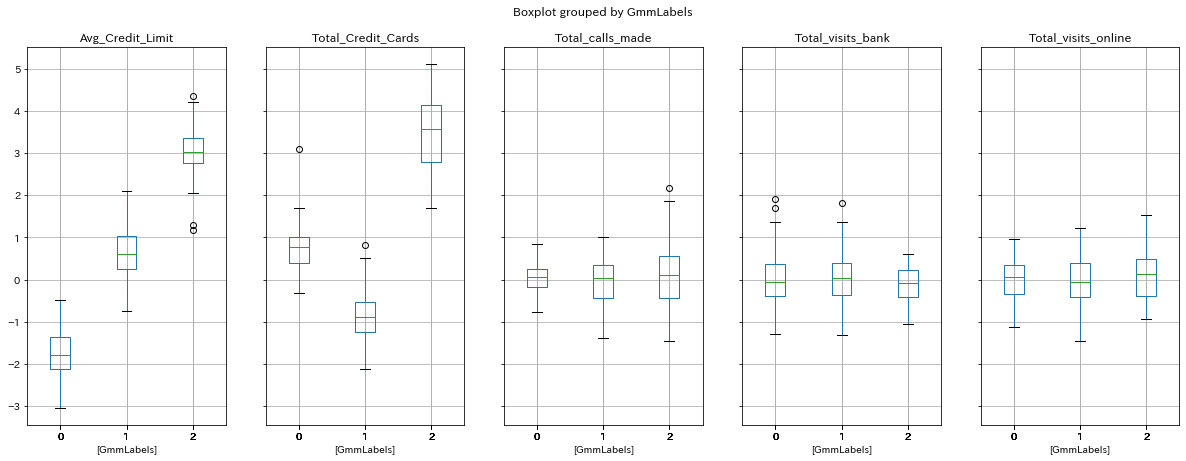

In [64]:
# Plotting boxplots with the new GMM based labels

features_with_lables = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "GmmLabels"]

data_copy[features_with_lables].boxplot(by = 'GmmLabels', layout = (1, 5),figsize = (20, 7))

plt.show()

**Cluster Profiles:  
-Cluster2 has the highest scores of credit scores and the highest number of credit cards. The calling frequency is distributed wide range and there is outlier. The range is wider than others. The visit online website of median is slightly higer than others. The frequency of visiting bank is approximately same as others. But the range is the narrowest.   

-It seems Cluster1 is categolized between Cluster0 and Cluster2. Regarding credit score of Cluster1, it is between Cluster0 and Cluster2. Their total credit cards is the lowest in the 3clusters. Visiting bank, call made, and visiting online websiteis are almost same as other 2 clusters. In term of specific details, Visit bank has outliers in upper side.  
 
-Regarding credit limit of Cluster0, it is the lowest in the 3clusters. The total credit card is between Cluster1 and Cluster2.There is outlier. Visiting bank, call made, and visiting online websiteis are almost same as other 2 clusters. In term of specific details, Visit bank has outliers in upper side. The range of call made is the narrows in the 3 clusters.  
**

**Comparing Clusters:    
 
-Comparing both result of the method K-means and Gaussian Mixture Model, they are very similar. 
We identified the 3 specific clusters which each characteristics is different.  
-It seems Cluster2 is wealthly and modern customers belonging.   
-Cluster1 is traditional and more focusing on cash compared to credit cards.  
-Cluster0 seems no time to call bank and some of them need to go bank often to get cash. Low credit limit and less credit cards implies they don't have good credit history.  

**  

## **K-Medoids**

### **Question 7:** 

- **Apply the K-Medoids clustering algorithm on the pca components with n_clusters=3 and random_state=1 ** 
- **Create cluster profiles using the below summary statistics and box plots for each label**
- **Compare the clusters from both algorithms - K-Means and K-Medoids **

In [65]:
kmedo = KMedoids(n_clusters = 3, random_state = 1)      # Apply the K-Medoids algorithm on the pca components with n_components=3 and random_state=1

kmedo.fit(data_pca)      # Fit the model on the pca components

data_copy['kmedoLabels'] = kmedo.predict(data_pca)

data['kmedoLabels'] = kmedo.predict(data_pca)

In [66]:
# Number of observations in each cluster
data.kmedoLabels.value_counts()

2    289
0    222
1    133
Name: kmedoLabels, dtype: int64

In [67]:
# Calculating summary statistics of the original data for each label
mean = data.groupby('kmedoLabels').mean()

median = data.groupby('kmedoLabels').median()

df_kmedoids = pd.concat([mean, median], axis = 0)

df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmedoids[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12216.216216,85052.631579,28449.826990,12000.0,68000.0,20000.0
Total_Credit_Cards,2.423423,7.030075,5.363322,2.0,7.0,5.0
Total_visits_bank,0.950450,1.691729,3.830450,1.0,2.0,4.0
Total_visits_online,3.554054,4.639098,0.982699,4.0,2.0,1.0
Total_calls_made,6.878378,1.969925,1.851211,7.0,2.0,2.0


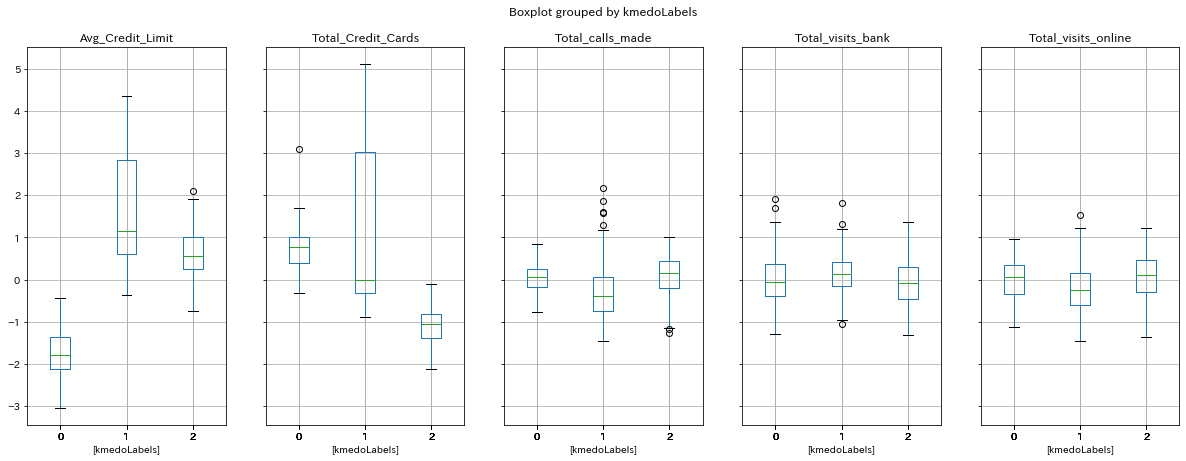

In [68]:
# Plotting boxplots with the new K-Medoids based labels

features_with_lables = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "kmedoLabels"]

data_copy[features_with_lables].boxplot(by = 'kmedoLabels', layout = (1, 5), figsize = (20, 7))

plt.show()

**Cluster Profiles:

-Cluster1 has the highest credit limit in the 3 clusters. The range is widest as well. The median of total Credit Cards is between Cluster0 and Cluser2. But the range is widest. The range between the median and the 75% has a lot of customers. The medians of total call made and total visit online are the lowest but there are outliers. The median of total visits bank is slightly higher than others and there are outliers.

-Regarding the credit limit of Cluster2 is between Cluster1 and Cluster0. There is outlier. The total credit is the lowest in the 3 clusters. The total call made is the highest. Visit bank and visit online are about same as others.

-Cluster0 has the lowest credit limit and the highest total credit cards. Call made, visit bank, and visit online are about same as others.  
**

Let's compare the clusters from K-Means and K-Medoids 

In [69]:
comparison = pd.concat([df_kmedoids, df_kmeans], axis = 1)[original_features]

comparison

,Avg_Credit_Limit,Avg_Credit_Limit,Total_Credit_Cards,Total_Credit_Cards,Total_visits_bank,Total_visits_bank,Total_visits_online,Total_visits_online,Total_calls_made,Total_calls_made
group_0 Mean,12216.216216,12239.819005,2.423423,2.411765,0.950450,0.945701,3.554054,3.561086,6.878378,6.891403
group_1 Mean,85052.631579,33893.048128,7.030075,5.508021,1.691729,3.489305,4.639098,0.975936,1.969925,1.997326
group_2 Mean,28449.826990,140102.040816,5.363322,8.775510,3.830450,0.591837,0.982699,10.979592,1.851211,1.102041
group_0 Median,12000.000000,12000.000000,2.000000,2.000000,1.000000,1.000000,4.000000,4.000000,7.000000,7.000000
group_1 Median,68000.000000,31500.000000,7.000000,6.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000
group_2 Median,20000.000000,145000.000000,5.000000,9.000000,4.000000,1.000000,1.000000,11.000000,2.000000,1.000000


**Comparing Clusters:   

As a result of K-Means and K-Medoids, after applying K-Medoids, Cluster2 and Cluster1 were swapped each position. The amount should not be changed too huge so I assume the each label was swapped.    
K-Medoids is robust at outliers compared to K-Means. So, after applying K-Medoids, there are outfilers which is not included the range. But K-Means includes those.   

Comparing the mean and the median of the results of K-Means and K-Medoids, Group0 did not change much from the result of K-Means to the result of K-Medoids.   
Group1 changed a lot of value of the mean and the median after applying K-Medoids.  
Group2's mean and median changed slighty.  
**